# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [78]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

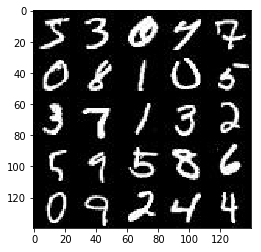

In [79]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

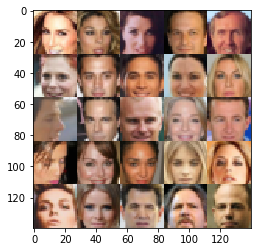

In [80]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [122]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\srika\Anaconda2\envs\dlnd-tf-lab\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [123]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name = 'inputs_real')
    inputs_z = tf.placeholder(tf.float32,(None,z_dim),name='inputs_z')
    learning_rate = tf.placeholder(tf.float32)
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [193]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    print("In")
    with tf.variable_scope('discriminator',reuse=reuse):
        #Input is 28*28*3
        alpha = 0.2
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        lrelu1 = tf.maximum(alpha*x1,x1)
        #14*14*64       
        
        x2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        #7x7x128
        print(lrelu2.shape)
        
        #lrelu2 = tf.reshape(lrelu2, (-1,8,8,128))
        #8x8x128
        
        x3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(alpha * bn2, bn2)#4x4X256
        print(lrelu3.shape)
        #4x4x256
        
        x4 = tf.layers.conv2d(lrelu3, 512, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x4, training=True)
        lrelu4 = tf.maximum(alpha * bn2, bn2)
        print(lrelu4.shape)
        #2x2x512

        # Flatten it
        lrelu4 = tf.nn.dropout(lrelu4,keep_prob=0.6)
        flat = tf.reshape(lrelu4, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1,kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.sigmoid(logits)

        print("out")
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [208]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    print("In G")
    with tf.variable_scope('generator',reuse= not is_train):      
        x1 = tf.layers.dense(z,2*2*512,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.reshape(x1,(-1,2,2,512))
        x1 = tf.layers.batch_normalization(x1, training= not is_train)
        x1 = tf.nn.relu(x1)
        # 2x2x512 now
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training= not is_train) 
        x2 = tf.nn.relu(x2)
        #4x4x256
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=3, padding='valid',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training= not is_train)
        #14x14x128
        
        #x3 = tf.reshape(x3,(-1,7,7,128))
        #x3 = tf.nn.relu(x3)
        #print(x3.shape)
        #7x7x128
        
        #x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        #x4 = tf.layers.batch_normalization(x4, training= not is_train)
        #x4 = tf.nn.relu(x4)
        ##14x14x64
        
        if is_train:
            x3 = tf.nn.dropout(x3,keep_prob=0.5)    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        # 28x28x3 now
        
        out = tf.tanh(logits)
        #print(out.shape)
        

        print("out G")
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

In G
out G
In G
out G
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [209]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

In G
out G
In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [210]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [211]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [212]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    # Create our input placeholders
    totalImages = data_shape[0]
    #print(totalImages)
    imageWidth = data_shape[1]
    imageHeight = data_shape[2]
    channels = data_shape[3]
    input_real,input_z,learningRate = model_inputs(imageWidth,imageHeight,channels,z_dim)
    learningRate = learning_rate
    d_loss,g_loss = model_loss(input_real, input_z, channels)
    d_train_opt,g_train_opt = model_opt(d_loss, g_loss, learningRate, beta1)
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                #print(batch_size)
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
              
                #get Loss
                #model_loss(input_real, input_z, out_channel_dim)
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                #print(learningRate)
                if steps % 10 == 0:
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                              "Discriminator Loss: {:.4f}...".format(train_loss_d),
                              "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 30, input_z, channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In G
out G
In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
In
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 2, 2, 512)
out
Epoch 1/2... Discriminator Loss: 3.3790... Generator Loss: 0.0750
Epoch 1/2... Discriminator Loss: 2.1069... Generator Loss: 0.2607
Epoch 1/2... Discriminator Loss: 0.6276... Generator Loss: 2.3644
Epoch 1/2... Discriminator Loss: 0.8862... Generator Loss: 1.1168
Epoch 1/2... Discriminator Loss: 2.3020... Generator Loss: 0.2089
Epoch 1/2... Discriminator Loss: 0.5807... Generator Loss: 3.1274
Epoch 1/2... Discriminator Loss: 0.6854... Generator Loss: 1.7358
Epoch 1/2... Discriminator Loss: 0.5147... Generator Loss: 3.0455
Epoch 1/2... Discriminator Loss: 0.8917... Generator Loss: 1.4819
Epoch 1/2... Discriminator Loss: 0.8316... Generator Loss: 0.8920
In G
out G


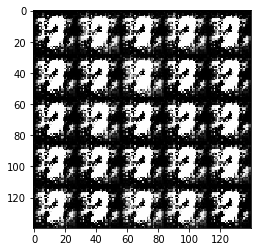

Epoch 1/2... Discriminator Loss: 0.5366... Generator Loss: 5.3895
Epoch 1/2... Discriminator Loss: 0.5159... Generator Loss: 2.3934
Epoch 1/2... Discriminator Loss: 0.5334... Generator Loss: 5.4982
Epoch 1/2... Discriminator Loss: 0.5148... Generator Loss: 2.1567
Epoch 1/2... Discriminator Loss: 0.4821... Generator Loss: 4.5605
Epoch 1/2... Discriminator Loss: 0.4306... Generator Loss: 3.5290
Epoch 1/2... Discriminator Loss: 0.4367... Generator Loss: 3.2713
Epoch 1/2... Discriminator Loss: 0.3977... Generator Loss: 3.9702
Epoch 1/2... Discriminator Loss: 0.4423... Generator Loss: 3.1853
Epoch 1/2... Discriminator Loss: 0.4443... Generator Loss: 3.4777
In G
out G


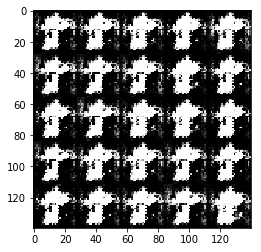

Epoch 1/2... Discriminator Loss: 0.4935... Generator Loss: 2.4721
Epoch 1/2... Discriminator Loss: 0.4804... Generator Loss: 3.6315
Epoch 1/2... Discriminator Loss: 0.4442... Generator Loss: 4.6857
Epoch 1/2... Discriminator Loss: 0.7862... Generator Loss: 1.9218
Epoch 1/2... Discriminator Loss: 0.4190... Generator Loss: 5.8900
Epoch 1/2... Discriminator Loss: 0.3830... Generator Loss: 4.1857
Epoch 1/2... Discriminator Loss: 0.3733... Generator Loss: 6.3397
Epoch 1/2... Discriminator Loss: 0.4948... Generator Loss: 2.6408
Epoch 1/2... Discriminator Loss: 0.4846... Generator Loss: 3.4164
Epoch 1/2... Discriminator Loss: 0.5296... Generator Loss: 5.5105
In G
out G


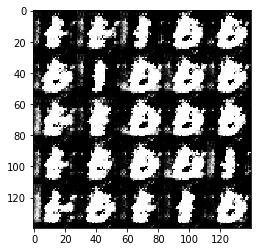

Epoch 1/2... Discriminator Loss: 0.4919... Generator Loss: 3.7019
Epoch 1/2... Discriminator Loss: 0.5625... Generator Loss: 2.2266
Epoch 1/2... Discriminator Loss: 0.6181... Generator Loss: 1.6398
Epoch 1/2... Discriminator Loss: 0.4612... Generator Loss: 3.2416
Epoch 1/2... Discriminator Loss: 0.4010... Generator Loss: 4.9607
Epoch 1/2... Discriminator Loss: 0.5258... Generator Loss: 1.9303
Epoch 1/2... Discriminator Loss: 0.4253... Generator Loss: 3.4321
Epoch 1/2... Discriminator Loss: 0.4010... Generator Loss: 4.5778
Epoch 1/2... Discriminator Loss: 0.4123... Generator Loss: 4.0084
Epoch 1/2... Discriminator Loss: 0.4192... Generator Loss: 4.8412
In G
out G


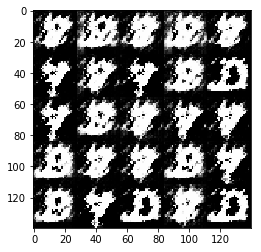

Epoch 1/2... Discriminator Loss: 0.4371... Generator Loss: 3.0815
Epoch 1/2... Discriminator Loss: 0.6283... Generator Loss: 7.0179
Epoch 1/2... Discriminator Loss: 0.4665... Generator Loss: 4.6926
Epoch 1/2... Discriminator Loss: 0.4901... Generator Loss: 3.3554
Epoch 1/2... Discriminator Loss: 0.4565... Generator Loss: 3.0294
Epoch 1/2... Discriminator Loss: 0.5756... Generator Loss: 6.3266
Epoch 1/2... Discriminator Loss: 0.4067... Generator Loss: 5.1668
Epoch 1/2... Discriminator Loss: 0.4758... Generator Loss: 2.6427
Epoch 1/2... Discriminator Loss: 0.4028... Generator Loss: 4.0062
Epoch 1/2... Discriminator Loss: 0.5054... Generator Loss: 3.9638
In G
out G


Epoch 1/2... Discriminator Loss: 0.4038... Generator Loss: 4.3143
Epoch 1/2... Discriminator Loss: 0.4148... Generator Loss: 3.4812
Epoch 1/2... Discriminator Loss: 0.4346... Generator Loss: 3.6652
Epoch 1/2... Discriminator Loss: 0.3820... Generator Loss: 7.9517
Epoch 1/2... Discriminator Loss: 0.3890... Generator Loss: 4.2680
Epoch 1/2... Discriminator Loss: 0.3813... Generator Loss: 3.6988
Epoch 1/2... Discriminator Loss: 0.3813... Generator Loss: 4.7505
Epoch 1/2... Discriminator Loss: 0.4388... Generator Loss: 4.3756
Epoch 1/2... Discriminator Loss: 0.5417... Generator Loss: 8.3203
Epoch 1/2... Discriminator Loss: 0.3792... Generator Loss: 4.8139
In G
out G


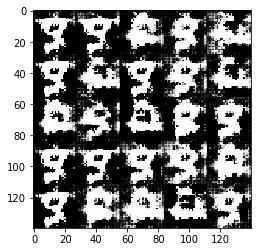

Epoch 1/2... Discriminator Loss: 0.3733... Generator Loss: 4.5002
Epoch 1/2... Discriminator Loss: 0.3862... Generator Loss: 3.8292
Epoch 1/2... Discriminator Loss: 0.4194... Generator Loss: 3.6452
Epoch 1/2... Discriminator Loss: 0.4418... Generator Loss: 4.0411
Epoch 1/2... Discriminator Loss: 0.5451... Generator Loss: 2.4179
Epoch 1/2... Discriminator Loss: 0.3725... Generator Loss: 6.2712
Epoch 1/2... Discriminator Loss: 0.6859... Generator Loss: 2.2990
Epoch 1/2... Discriminator Loss: 0.4499... Generator Loss: 2.9174
Epoch 1/2... Discriminator Loss: 0.6750... Generator Loss: 1.7442
Epoch 1/2... Discriminator Loss: 0.4069... Generator Loss: 5.0718
In G
out G


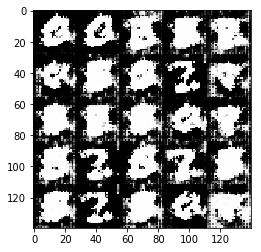

Epoch 1/2... Discriminator Loss: 0.4211... Generator Loss: 3.4623
Epoch 1/2... Discriminator Loss: 0.3834... Generator Loss: 3.9841
Epoch 1/2... Discriminator Loss: 0.6080... Generator Loss: 6.7514
Epoch 1/2... Discriminator Loss: 0.5042... Generator Loss: 2.4442
Epoch 1/2... Discriminator Loss: 0.4621... Generator Loss: 2.8481
Epoch 1/2... Discriminator Loss: 0.4142... Generator Loss: 3.5955
Epoch 1/2... Discriminator Loss: 0.3906... Generator Loss: 3.8589
Epoch 1/2... Discriminator Loss: 0.6242... Generator Loss: 2.0261
Epoch 1/2... Discriminator Loss: 1.4098... Generator Loss: 2.0726
Epoch 1/2... Discriminator Loss: 0.6200... Generator Loss: 1.9252
In G
out G


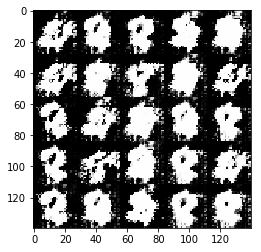

Epoch 1/2... Discriminator Loss: 0.8794... Generator Loss: 1.4076
Epoch 1/2... Discriminator Loss: 0.4384... Generator Loss: 4.0097
Epoch 1/2... Discriminator Loss: 0.5170... Generator Loss: 5.8956
Epoch 1/2... Discriminator Loss: 0.6857... Generator Loss: 6.0950
Epoch 1/2... Discriminator Loss: 0.5781... Generator Loss: 2.0265
Epoch 1/2... Discriminator Loss: 0.6737... Generator Loss: 2.9043
Epoch 1/2... Discriminator Loss: 1.7380... Generator Loss: 0.6449
Epoch 1/2... Discriminator Loss: 0.9578... Generator Loss: 1.7737
Epoch 1/2... Discriminator Loss: 1.1974... Generator Loss: 1.2009
Epoch 1/2... Discriminator Loss: 0.8462... Generator Loss: 3.4402
In G
out G


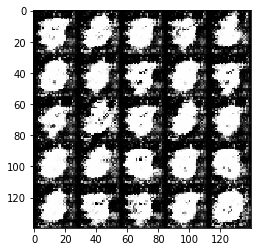

Epoch 1/2... Discriminator Loss: 0.8086... Generator Loss: 1.7491
Epoch 1/2... Discriminator Loss: 0.6912... Generator Loss: 1.8488
Epoch 1/2... Discriminator Loss: 1.0850... Generator Loss: 0.7965
Epoch 1/2... Discriminator Loss: 0.6812... Generator Loss: 2.9645
Epoch 1/2... Discriminator Loss: 0.4339... Generator Loss: 3.8700
Epoch 1/2... Discriminator Loss: 0.7838... Generator Loss: 1.4314
Epoch 1/2... Discriminator Loss: 0.9057... Generator Loss: 1.1519
Epoch 1/2... Discriminator Loss: 0.9971... Generator Loss: 6.3115
Epoch 1/2... Discriminator Loss: 0.8362... Generator Loss: 1.2671
Epoch 1/2... Discriminator Loss: 0.8059... Generator Loss: 1.2789
In G
out G


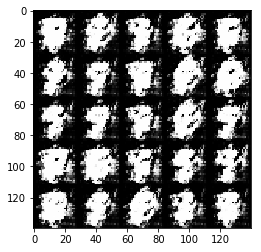

Epoch 1/2... Discriminator Loss: 0.4755... Generator Loss: 2.3338
Epoch 1/2... Discriminator Loss: 0.4713... Generator Loss: 2.2413
Epoch 1/2... Discriminator Loss: 3.3471... Generator Loss: 0.1454
Epoch 1/2... Discriminator Loss: 0.7501... Generator Loss: 1.3778
Epoch 1/2... Discriminator Loss: 0.6648... Generator Loss: 1.6643
Epoch 1/2... Discriminator Loss: 0.7423... Generator Loss: 1.3422
Epoch 1/2... Discriminator Loss: 0.5184... Generator Loss: 2.4842
Epoch 1/2... Discriminator Loss: 0.5450... Generator Loss: 2.3821
Epoch 1/2... Discriminator Loss: 0.5108... Generator Loss: 3.1092
Epoch 1/2... Discriminator Loss: 0.7358... Generator Loss: 1.3201
In G
out G


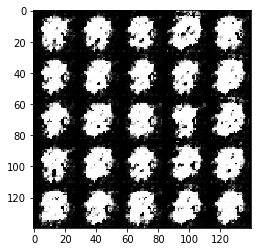

Epoch 1/2... Discriminator Loss: 0.4544... Generator Loss: 3.2571
Epoch 1/2... Discriminator Loss: 0.5157... Generator Loss: 2.4748
Epoch 1/2... Discriminator Loss: 1.2199... Generator Loss: 0.7294
Epoch 1/2... Discriminator Loss: 1.1368... Generator Loss: 0.9187
Epoch 1/2... Discriminator Loss: 1.0237... Generator Loss: 1.0958
Epoch 1/2... Discriminator Loss: 0.9997... Generator Loss: 0.7272
Epoch 1/2... Discriminator Loss: 0.7376... Generator Loss: 1.2916
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 1.2886
Epoch 1/2... Discriminator Loss: 0.6654... Generator Loss: 1.5730
Epoch 1/2... Discriminator Loss: 0.6283... Generator Loss: 1.7196
In G
out G


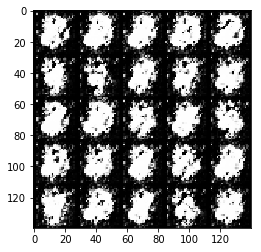

Epoch 1/2... Discriminator Loss: 0.4545... Generator Loss: 2.7865
Epoch 1/2... Discriminator Loss: 0.4148... Generator Loss: 4.1216
Epoch 1/2... Discriminator Loss: 0.5064... Generator Loss: 2.5639
Epoch 1/2... Discriminator Loss: 0.6067... Generator Loss: 1.8382
Epoch 1/2... Discriminator Loss: 0.4478... Generator Loss: 2.6065
Epoch 1/2... Discriminator Loss: 0.7479... Generator Loss: 1.7010
Epoch 1/2... Discriminator Loss: 0.4582... Generator Loss: 2.3521
Epoch 1/2... Discriminator Loss: 0.4393... Generator Loss: 2.7604
Epoch 1/2... Discriminator Loss: 0.4946... Generator Loss: 2.3364
Epoch 1/2... Discriminator Loss: 0.4448... Generator Loss: 2.5691
In G
out G


Epoch 1/2... Discriminator Loss: 0.3820... Generator Loss: 3.9806
Epoch 1/2... Discriminator Loss: 0.3691... Generator Loss: 4.3094
Epoch 1/2... Discriminator Loss: 0.8979... Generator Loss: 1.4842
Epoch 1/2... Discriminator Loss: 0.5590... Generator Loss: 2.1902
Epoch 1/2... Discriminator Loss: 0.4010... Generator Loss: 3.5255
Epoch 1/2... Discriminator Loss: 0.4860... Generator Loss: 2.2005
Epoch 1/2... Discriminator Loss: 0.3728... Generator Loss: 5.1007
Epoch 1/2... Discriminator Loss: 0.4174... Generator Loss: 2.7455
Epoch 1/2... Discriminator Loss: 0.6013... Generator Loss: 1.7821
Epoch 1/2... Discriminator Loss: 0.4426... Generator Loss: 3.1786
In G
out G


Epoch 1/2... Discriminator Loss: 0.4092... Generator Loss: 3.3505
Epoch 1/2... Discriminator Loss: 0.6309... Generator Loss: 1.5138
Epoch 1/2... Discriminator Loss: 0.6300... Generator Loss: 1.9963
Epoch 1/2... Discriminator Loss: 0.7458... Generator Loss: 1.4316
Epoch 1/2... Discriminator Loss: 0.4565... Generator Loss: 3.1212
Epoch 1/2... Discriminator Loss: 0.3940... Generator Loss: 3.4923
Epoch 1/2... Discriminator Loss: 0.6441... Generator Loss: 1.6436
Epoch 1/2... Discriminator Loss: 0.4941... Generator Loss: 2.6318
Epoch 1/2... Discriminator Loss: 0.4914... Generator Loss: 2.3564
Epoch 1/2... Discriminator Loss: 0.4527... Generator Loss: 2.6222
In G
out G


Epoch 1/2... Discriminator Loss: 0.5547... Generator Loss: 2.0754
Epoch 1/2... Discriminator Loss: 0.3742... Generator Loss: 4.0798
Epoch 1/2... Discriminator Loss: 0.4318... Generator Loss: 2.6683
Epoch 1/2... Discriminator Loss: 0.7379... Generator Loss: 1.7657
Epoch 1/2... Discriminator Loss: 0.4015... Generator Loss: 3.4403
Epoch 1/2... Discriminator Loss: 0.3917... Generator Loss: 4.1420
Epoch 1/2... Discriminator Loss: 0.4838... Generator Loss: 2.4219
Epoch 1/2... Discriminator Loss: 0.4512... Generator Loss: 3.0105
Epoch 1/2... Discriminator Loss: 0.3918... Generator Loss: 3.8204
Epoch 1/2... Discriminator Loss: 0.5265... Generator Loss: 2.5038
In G
out G


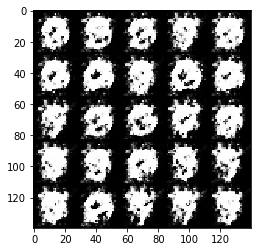

Epoch 1/2... Discriminator Loss: 0.4306... Generator Loss: 3.1735
Epoch 1/2... Discriminator Loss: 0.3844... Generator Loss: 3.5052
Epoch 1/2... Discriminator Loss: 0.3652... Generator Loss: 4.7505
Epoch 1/2... Discriminator Loss: 0.3650... Generator Loss: 3.6782
Epoch 1/2... Discriminator Loss: 0.4124... Generator Loss: 3.8126
Epoch 1/2... Discriminator Loss: 0.3618... Generator Loss: 5.0987
Epoch 1/2... Discriminator Loss: 0.4127... Generator Loss: 3.6925
Epoch 1/2... Discriminator Loss: 0.3733... Generator Loss: 4.4063
Epoch 1/2... Discriminator Loss: 0.4138... Generator Loss: 3.2804
Epoch 1/2... Discriminator Loss: 0.3556... Generator Loss: 5.6441
In G
out G


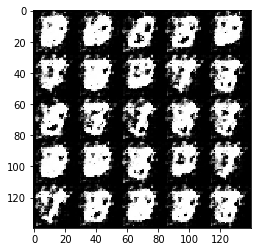

Epoch 1/2... Discriminator Loss: 0.3893... Generator Loss: 4.5942
Epoch 1/2... Discriminator Loss: 1.6341... Generator Loss: 0.6160
Epoch 1/2... Discriminator Loss: 0.3951... Generator Loss: 4.0513
Epoch 1/2... Discriminator Loss: 0.3959... Generator Loss: 3.5891
Epoch 1/2... Discriminator Loss: 0.4653... Generator Loss: 2.6499
Epoch 1/2... Discriminator Loss: 0.5088... Generator Loss: 2.2416
Epoch 1/2... Discriminator Loss: 0.4185... Generator Loss: 3.4684
Epoch 1/2... Discriminator Loss: 0.4131... Generator Loss: 3.2738
Epoch 1/2... Discriminator Loss: 0.3880... Generator Loss: 4.9952
Epoch 1/2... Discriminator Loss: 0.3706... Generator Loss: 4.2871
In G
out G


Epoch 1/2... Discriminator Loss: 0.4509... Generator Loss: 2.9353
Epoch 1/2... Discriminator Loss: 0.5679... Generator Loss: 1.9313
Epoch 1/2... Discriminator Loss: 0.3954... Generator Loss: 4.1973
Epoch 1/2... Discriminator Loss: 0.3818... Generator Loss: 4.6316
Epoch 1/2... Discriminator Loss: 0.3661... Generator Loss: 4.7990
Epoch 1/2... Discriminator Loss: 0.4039... Generator Loss: 3.7286
Epoch 1/2... Discriminator Loss: 0.3699... Generator Loss: 4.7811
Epoch 2/2... Discriminator Loss: 0.4218... Generator Loss: 3.0672
Epoch 2/2... Discriminator Loss: 0.3631... Generator Loss: 5.1978
Epoch 2/2... Discriminator Loss: 0.5567... Generator Loss: 4.5756
In G
out G


Epoch 2/2... Discriminator Loss: 0.7927... Generator Loss: 1.4700
Epoch 2/2... Discriminator Loss: 0.4674... Generator Loss: 1.9978
Epoch 2/2... Discriminator Loss: 0.4159... Generator Loss: 3.3124
Epoch 2/2... Discriminator Loss: 0.3808... Generator Loss: 4.6444
Epoch 2/2... Discriminator Loss: 0.4445... Generator Loss: 3.1190
Epoch 2/2... Discriminator Loss: 0.3806... Generator Loss: 3.7342
Epoch 2/2... Discriminator Loss: 0.4823... Generator Loss: 2.5332
Epoch 2/2... Discriminator Loss: 0.3965... Generator Loss: 3.6237
Epoch 2/2... Discriminator Loss: 0.3648... Generator Loss: 4.3146
Epoch 2/2... Discriminator Loss: 0.3692... Generator Loss: 3.6344
In G
out G


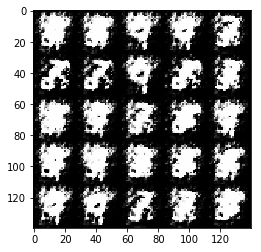

Epoch 2/2... Discriminator Loss: 0.3663... Generator Loss: 5.7656
Epoch 2/2... Discriminator Loss: 0.3626... Generator Loss: 4.5871
Epoch 2/2... Discriminator Loss: 0.3755... Generator Loss: 4.2243
Epoch 2/2... Discriminator Loss: 0.3738... Generator Loss: 4.1896
Epoch 2/2... Discriminator Loss: 0.3625... Generator Loss: 6.0906
Epoch 2/2... Discriminator Loss: 0.3655... Generator Loss: 4.5875
Epoch 2/2... Discriminator Loss: 0.4055... Generator Loss: 2.7007
Epoch 2/2... Discriminator Loss: 0.3961... Generator Loss: 3.5459
Epoch 2/2... Discriminator Loss: 0.3937... Generator Loss: 4.2564
Epoch 2/2... Discriminator Loss: 0.3489... Generator Loss: 5.0272
In G
out G


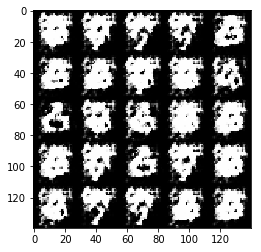

Epoch 2/2... Discriminator Loss: 0.3807... Generator Loss: 4.6969
Epoch 2/2... Discriminator Loss: 0.3608... Generator Loss: 5.0403
Epoch 2/2... Discriminator Loss: 0.3502... Generator Loss: 6.3017
Epoch 2/2... Discriminator Loss: 0.5045... Generator Loss: 2.3314
Epoch 2/2... Discriminator Loss: 0.5378... Generator Loss: 2.1119
Epoch 2/2... Discriminator Loss: 0.4329... Generator Loss: 3.1793
Epoch 2/2... Discriminator Loss: 0.4453... Generator Loss: 3.1377
Epoch 2/2... Discriminator Loss: 0.5094... Generator Loss: 2.4482
Epoch 2/2... Discriminator Loss: 0.3939... Generator Loss: 3.6035
Epoch 2/2... Discriminator Loss: 0.4604... Generator Loss: 2.8234
In G
out G


Epoch 2/2... Discriminator Loss: 0.4768... Generator Loss: 2.5982
Epoch 2/2... Discriminator Loss: 0.5371... Generator Loss: 5.4809
Epoch 2/2... Discriminator Loss: 0.4212... Generator Loss: 2.9012
Epoch 2/2... Discriminator Loss: 0.4051... Generator Loss: 3.8977
Epoch 2/2... Discriminator Loss: 0.4146... Generator Loss: 3.9984
Epoch 2/2... Discriminator Loss: 0.3967... Generator Loss: 3.3710
Epoch 2/2... Discriminator Loss: 0.3753... Generator Loss: 6.0669
Epoch 2/2... Discriminator Loss: 0.3996... Generator Loss: 3.4971
Epoch 2/2... Discriminator Loss: 0.3785... Generator Loss: 5.1082
Epoch 2/2... Discriminator Loss: 0.3597... Generator Loss: 4.5035
In G
out G


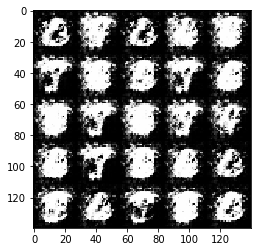

Epoch 2/2... Discriminator Loss: 0.4137... Generator Loss: 3.0851
Epoch 2/2... Discriminator Loss: 0.3738... Generator Loss: 4.0086
Epoch 2/2... Discriminator Loss: 0.4539... Generator Loss: 3.1458
Epoch 2/2... Discriminator Loss: 0.3861... Generator Loss: 2.9662
Epoch 2/2... Discriminator Loss: 0.3597... Generator Loss: 4.6238
Epoch 2/2... Discriminator Loss: 0.3636... Generator Loss: 5.9321
Epoch 2/2... Discriminator Loss: 0.3935... Generator Loss: 3.6983
Epoch 2/2... Discriminator Loss: 0.3762... Generator Loss: 4.3252
Epoch 2/2... Discriminator Loss: 0.3607... Generator Loss: 5.9136
Epoch 2/2... Discriminator Loss: 0.4132... Generator Loss: 2.9567
In G
out G


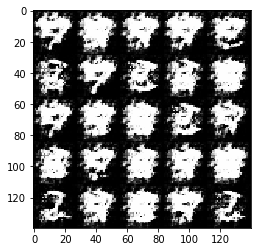

Epoch 2/2... Discriminator Loss: 0.3678... Generator Loss: 6.1665
Epoch 2/2... Discriminator Loss: 0.3606... Generator Loss: 4.6943
Epoch 2/2... Discriminator Loss: 0.3694... Generator Loss: 4.2983
Epoch 2/2... Discriminator Loss: 0.3931... Generator Loss: 3.4765
Epoch 2/2... Discriminator Loss: 0.3595... Generator Loss: 4.3767
Epoch 2/2... Discriminator Loss: 0.3592... Generator Loss: 5.1394
Epoch 2/2... Discriminator Loss: 0.4579... Generator Loss: 3.1426
Epoch 2/2... Discriminator Loss: 0.6140... Generator Loss: 1.8062
Epoch 2/2... Discriminator Loss: 0.4228... Generator Loss: 3.0748
Epoch 2/2... Discriminator Loss: 0.3907... Generator Loss: 4.6712
In G
out G


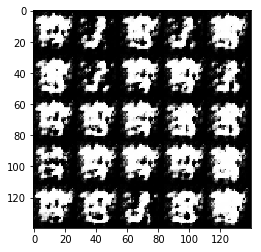

Epoch 2/2... Discriminator Loss: 0.3668... Generator Loss: 4.7701
Epoch 2/2... Discriminator Loss: 0.3818... Generator Loss: 4.0662
Epoch 2/2... Discriminator Loss: 0.3720... Generator Loss: 3.9741
Epoch 2/2... Discriminator Loss: 0.3618... Generator Loss: 5.2854
Epoch 2/2... Discriminator Loss: 0.3916... Generator Loss: 3.9630
Epoch 2/2... Discriminator Loss: 0.3596... Generator Loss: 4.2576
Epoch 2/2... Discriminator Loss: 0.4106... Generator Loss: 3.1314
Epoch 2/2... Discriminator Loss: 0.3624... Generator Loss: 5.1558
Epoch 2/2... Discriminator Loss: 0.3541... Generator Loss: 4.6885
Epoch 2/2... Discriminator Loss: 0.3747... Generator Loss: 4.2266
In G
out G


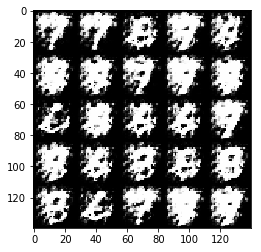

Epoch 2/2... Discriminator Loss: 0.3810... Generator Loss: 3.0871
Epoch 2/2... Discriminator Loss: 0.4885... Generator Loss: 7.5875
Epoch 2/2... Discriminator Loss: 0.4503... Generator Loss: 2.5747
Epoch 2/2... Discriminator Loss: 0.7306... Generator Loss: 2.0163
Epoch 2/2... Discriminator Loss: 0.5870... Generator Loss: 2.1510
Epoch 2/2... Discriminator Loss: 0.4693... Generator Loss: 2.9855
Epoch 2/2... Discriminator Loss: 0.4466... Generator Loss: 3.1943
Epoch 2/2... Discriminator Loss: 0.4312... Generator Loss: 2.8772
Epoch 2/2... Discriminator Loss: 0.3728... Generator Loss: 4.1649
Epoch 2/2... Discriminator Loss: 0.3849... Generator Loss: 4.2045
In G
out G


Epoch 2/2... Discriminator Loss: 0.3645... Generator Loss: 4.9430
Epoch 2/2... Discriminator Loss: 0.5223... Generator Loss: 2.4050
Epoch 2/2... Discriminator Loss: 0.3807... Generator Loss: 5.2208
Epoch 2/2... Discriminator Loss: 0.3556... Generator Loss: 5.0839
Epoch 2/2... Discriminator Loss: 0.3745... Generator Loss: 4.1954
Epoch 2/2... Discriminator Loss: 0.3404... Generator Loss: 6.2757
Epoch 2/2... Discriminator Loss: 0.3624... Generator Loss: 4.6816
Epoch 2/2... Discriminator Loss: 0.3460... Generator Loss: 4.2078
Epoch 2/2... Discriminator Loss: 0.3728... Generator Loss: 3.9427
Epoch 2/2... Discriminator Loss: 0.3604... Generator Loss: 4.4111
In G
out G


Epoch 2/2... Discriminator Loss: 0.3534... Generator Loss: 4.7694
Epoch 2/2... Discriminator Loss: 0.3936... Generator Loss: 3.8576
Epoch 2/2... Discriminator Loss: 0.3531... Generator Loss: 6.5058
Epoch 2/2... Discriminator Loss: 0.3566... Generator Loss: 4.0745
Epoch 2/2... Discriminator Loss: 0.4753... Generator Loss: 2.2739
Epoch 2/2... Discriminator Loss: 0.3838... Generator Loss: 3.9745
Epoch 2/2... Discriminator Loss: 0.5462... Generator Loss: 4.7761
Epoch 2/2... Discriminator Loss: 0.3715... Generator Loss: 3.8412
Epoch 2/2... Discriminator Loss: 0.3653... Generator Loss: 3.8385
Epoch 2/2... Discriminator Loss: 0.3631... Generator Loss: 4.1183
In G
out G


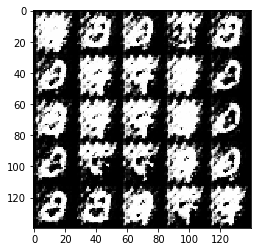

Epoch 2/2... Discriminator Loss: 0.3878... Generator Loss: 4.0636
Epoch 2/2... Discriminator Loss: 0.3858... Generator Loss: 3.5107
Epoch 2/2... Discriminator Loss: 0.3520... Generator Loss: 5.1703
Epoch 2/2... Discriminator Loss: 0.3596... Generator Loss: 4.9492
Epoch 2/2... Discriminator Loss: 0.3644... Generator Loss: 4.9292
Epoch 2/2... Discriminator Loss: 0.3733... Generator Loss: 4.0269
Epoch 2/2... Discriminator Loss: 0.3539... Generator Loss: 4.6190
Epoch 2/2... Discriminator Loss: 0.3820... Generator Loss: 2.9990
Epoch 2/2... Discriminator Loss: 0.3660... Generator Loss: 4.2512
Epoch 2/2... Discriminator Loss: 0.3664... Generator Loss: 4.9677
In G
out G


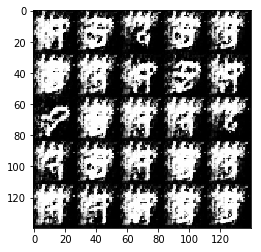

Epoch 2/2... Discriminator Loss: 0.3684... Generator Loss: 4.1875
Epoch 2/2... Discriminator Loss: 0.3955... Generator Loss: 3.5582
Epoch 2/2... Discriminator Loss: 0.3730... Generator Loss: 3.9634
Epoch 2/2... Discriminator Loss: 0.3913... Generator Loss: 3.3062
Epoch 2/2... Discriminator Loss: 0.3552... Generator Loss: 5.1439
Epoch 2/2... Discriminator Loss: 0.3432... Generator Loss: 5.7576
Epoch 2/2... Discriminator Loss: 0.3542... Generator Loss: 4.9852
Epoch 2/2... Discriminator Loss: 0.3371... Generator Loss: 5.8609
Epoch 2/2... Discriminator Loss: 0.3700... Generator Loss: 4.3939
Epoch 2/2... Discriminator Loss: 0.3827... Generator Loss: 3.4832
In G
out G


Epoch 2/2... Discriminator Loss: 0.3501... Generator Loss: 5.0166
Epoch 2/2... Discriminator Loss: 0.3506... Generator Loss: 4.9728
Epoch 2/2... Discriminator Loss: 0.3504... Generator Loss: 5.3665
Epoch 2/2... Discriminator Loss: 0.3524... Generator Loss: 4.2243
Epoch 2/2... Discriminator Loss: 0.3558... Generator Loss: 5.7325
Epoch 2/2... Discriminator Loss: 0.3627... Generator Loss: 4.3773
Epoch 2/2... Discriminator Loss: 0.3713... Generator Loss: 4.8005
Epoch 2/2... Discriminator Loss: 0.3683... Generator Loss: 4.8725
Epoch 2/2... Discriminator Loss: 0.3809... Generator Loss: 3.6302
Epoch 2/2... Discriminator Loss: 0.3659... Generator Loss: 4.9159
In G
out G


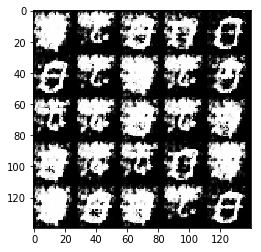

Epoch 2/2... Discriminator Loss: 0.3508... Generator Loss: 6.2090
Epoch 2/2... Discriminator Loss: 0.3646... Generator Loss: 3.7767
Epoch 2/2... Discriminator Loss: 0.3621... Generator Loss: 4.5442
Epoch 2/2... Discriminator Loss: 0.3847... Generator Loss: 3.8472
Epoch 2/2... Discriminator Loss: 0.3537... Generator Loss: 4.4910
Epoch 2/2... Discriminator Loss: 0.3540... Generator Loss: 6.8637
Epoch 2/2... Discriminator Loss: 0.3464... Generator Loss: 5.9590
Epoch 2/2... Discriminator Loss: 0.3579... Generator Loss: 4.3170
Epoch 2/2... Discriminator Loss: 0.3564... Generator Loss: 4.0584
Epoch 2/2... Discriminator Loss: 0.3615... Generator Loss: 3.9243
In G
out G


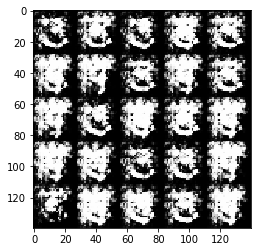

Epoch 2/2... Discriminator Loss: 0.3406... Generator Loss: 5.8318
Epoch 2/2... Discriminator Loss: 0.3479... Generator Loss: 5.3747
Epoch 2/2... Discriminator Loss: 0.3406... Generator Loss: 5.4884
Epoch 2/2... Discriminator Loss: 0.3726... Generator Loss: 4.8752
Epoch 2/2... Discriminator Loss: 0.3678... Generator Loss: 4.6180
Epoch 2/2... Discriminator Loss: 0.3382... Generator Loss: 5.6489
Epoch 2/2... Discriminator Loss: 0.3464... Generator Loss: 5.2947
Epoch 2/2... Discriminator Loss: 0.3477... Generator Loss: 5.6153
Epoch 2/2... Discriminator Loss: 0.3466... Generator Loss: 5.6601
Epoch 2/2... Discriminator Loss: 0.3497... Generator Loss: 4.9353
In G
out G


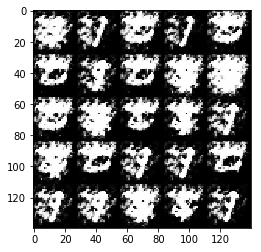

Epoch 2/2... Discriminator Loss: 0.3402... Generator Loss: 6.1847
Epoch 2/2... Discriminator Loss: 0.3413... Generator Loss: 5.1604
Epoch 2/2... Discriminator Loss: 0.4083... Generator Loss: 3.5975
Epoch 2/2... Discriminator Loss: 0.3643... Generator Loss: 4.7373
Epoch 2/2... Discriminator Loss: 0.3662... Generator Loss: 4.2212
Epoch 2/2... Discriminator Loss: 0.3970... Generator Loss: 3.4501
Epoch 2/2... Discriminator Loss: 0.3456... Generator Loss: 6.3176
Epoch 2/2... Discriminator Loss: 0.3738... Generator Loss: 6.0780
Epoch 2/2... Discriminator Loss: 0.3438... Generator Loss: 6.0361
Epoch 2/2... Discriminator Loss: 0.3620... Generator Loss: 4.4450
In G
out G


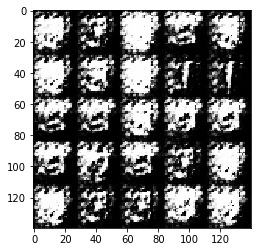

Epoch 2/2... Discriminator Loss: 0.3714... Generator Loss: 3.8131
Epoch 2/2... Discriminator Loss: 0.3529... Generator Loss: 5.3555
Epoch 2/2... Discriminator Loss: 0.3552... Generator Loss: 4.9632
Epoch 2/2... Discriminator Loss: 0.3591... Generator Loss: 4.2779
Epoch 2/2... Discriminator Loss: 0.3575... Generator Loss: 4.9917
Epoch 2/2... Discriminator Loss: 0.3421... Generator Loss: 6.1915
Epoch 2/2... Discriminator Loss: 0.3529... Generator Loss: 4.4559
Epoch 2/2... Discriminator Loss: 0.3611... Generator Loss: 4.7208
Epoch 2/2... Discriminator Loss: 0.3884... Generator Loss: 4.5835
Epoch 2/2... Discriminator Loss: 0.3711... Generator Loss: 4.8829
In G
out G


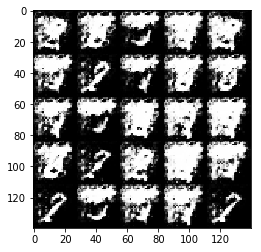

Epoch 2/2... Discriminator Loss: 0.3584... Generator Loss: 5.6285
Epoch 2/2... Discriminator Loss: 0.3754... Generator Loss: 3.2734
Epoch 2/2... Discriminator Loss: 2.2704... Generator Loss: 13.8467
Epoch 2/2... Discriminator Loss: 0.4671... Generator Loss: 3.9371
Epoch 2/2... Discriminator Loss: 0.4224... Generator Loss: 3.5630
Epoch 2/2... Discriminator Loss: 0.4126... Generator Loss: 4.1877
Epoch 2/2... Discriminator Loss: 0.4223... Generator Loss: 3.1924
Epoch 2/2... Discriminator Loss: 0.6822... Generator Loss: 1.5404
Epoch 2/2... Discriminator Loss: 0.4147... Generator Loss: 3.2580
Epoch 2/2... Discriminator Loss: 0.5062... Generator Loss: 2.9631
In G
out G


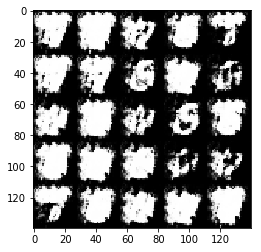

Epoch 2/2... Discriminator Loss: 0.3674... Generator Loss: 4.5419
Epoch 2/2... Discriminator Loss: 0.3696... Generator Loss: 7.0415
Epoch 2/2... Discriminator Loss: 0.3582... Generator Loss: 7.0774
Epoch 2/2... Discriminator Loss: 0.4009... Generator Loss: 8.7067
Epoch 2/2... Discriminator Loss: 0.3813... Generator Loss: 3.9569


IndexError: list index out of range

In [213]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.